In [1]:
import pandas as pd
pd.set_option('display.max_column', 250)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
from matplotlib import rcParams
%matplotlib notebook

In [2]:
def to_file(stream, n_sample, f_name):
    stream.prepare_for_use()
    stream.generate_drift()
    
    X, y = stream.next_sample(n_sample)
    stream.feature_names.append('label')
    df = pd.DataFrame(np.hstack((X,np.array([y]).T)), columns=stream.feature_names)
    df.to_csv(f_name)

In [3]:
def to_DataFrame(stream, n_sample):
    stream.prepare_for_use()
    X, y = stream.next_sample(n_sample)
    stream.feature_names.append('label')
    df = pd.DataFrame(np.hstack((X,np.array([y]).T)), columns=stream.feature_names)
    return df

In [15]:
from skmultiflow.data.concept_drift_stream import ConceptDriftStream
from skmultiflow.data.sine_generator import SineGenerator

stream = ConceptDriftStream(
    stream=SineGenerator(classification_function=0, random_state=42),
    drift_stream=SineGenerator(classification_function=1, random_state=1),
    random_state=42,
    position=25000,
    width=1
)
df = to_DataFrame(stream, 50000)

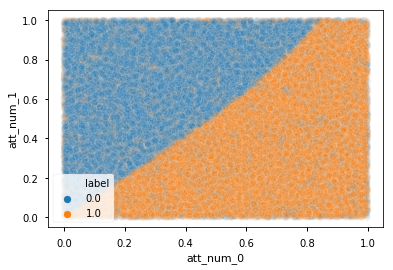

In [16]:
%matplotlib inline
sns.scatterplot('att_num_0', 'att_num_1', data=df, hue='label', alpha=0.1)

In [17]:
df.describe()

,att_num_0,att_num_1,label
count,50000.000000,50000.000000,50000.000000
mean,0.498488,0.499705,0.498420
std,0.287575,0.290070,0.500003
min,0.000006,0.000011,0.000000
25%,0.249984,0.246082,0.000000
50%,0.498551,0.502075,0.000000
75%,0.745917,0.751854,1.000000
max,0.999972,0.999990,1.000000


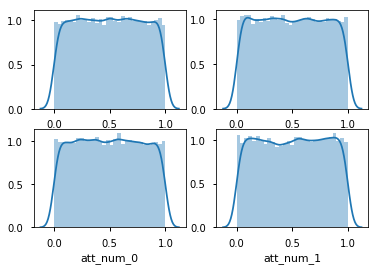

In [22]:
f, axes = plt.subplots(2, 2)

for i in range(2):
    sns.distplot(df.iloc[:25000,i], ax=axes[0,i])
    sns.distplot(df.iloc[25000:,i], ax=axes[1,i])

In [32]:
from skmultiflow.bayes import NaiveBayes
nb = NaiveBayes()

from skmultiflow.evaluation import EvaluatePrequential
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=200,
                                max_samples=20000,
                                metrics=['accuracy'])

<IPython.core.display.Javascript object>


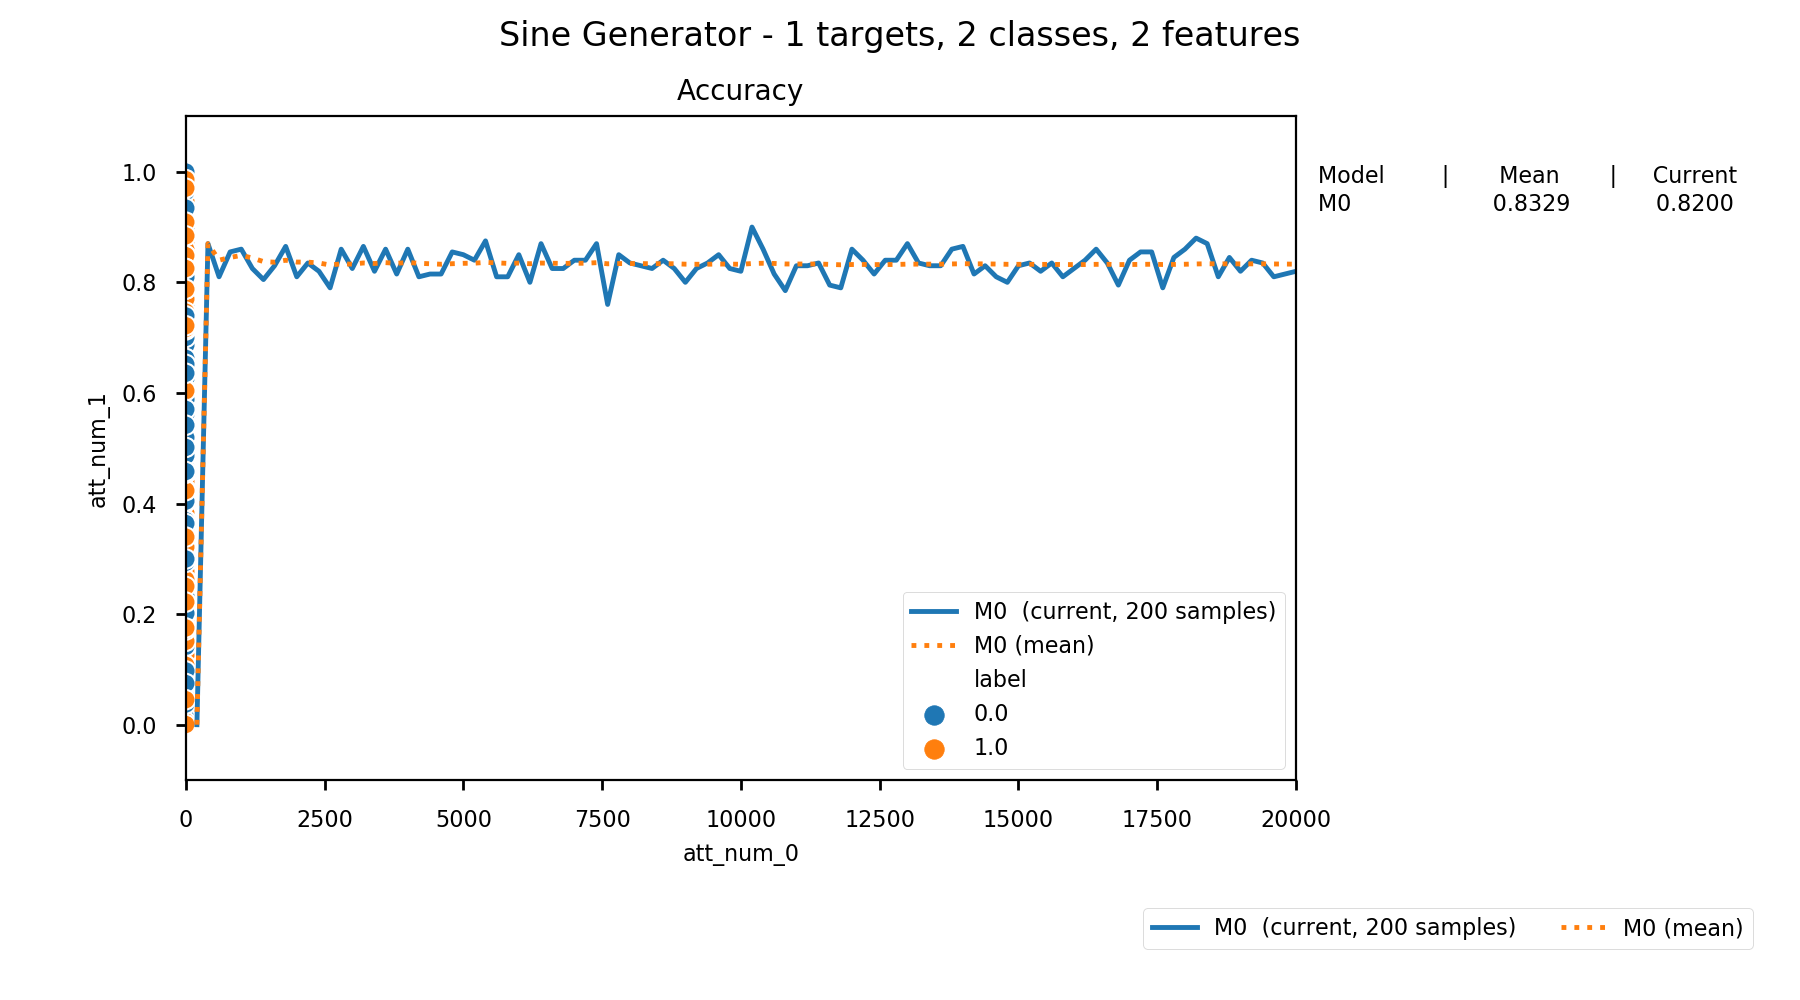

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [6.54s]
Processed samples: 20000
Mean performance:
M0 - Accuracy     : 0.8329


In [33]:
evaluator.evaluate(stream, nb)

In [13]:
df.head()

,att_num_0,att_num_1,label
0,0.374540,0.950714,1.0
1,0.731994,0.598658,0.0
2,0.156019,0.155995,0.0
3,0.058084,0.866176,1.0
4,0.601115,0.708073,1.0


In [81]:
sine = SineGenerator(random_state=42)
to_file(sine, 100000, 'test2.csv')

In [11]:
from skmultiflow.data.random_rbf_generator_drift import RandomRBFGeneratorDrift
from skmultiflow.data.random_rbf_generator import RandomRBFGenerator

from skmultiflow.bayes import NaiveBayes
nb = NaiveBayes()

from skmultiflow.evaluation import EvaluatePrequential
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=200,
                                max_samples=10000,
                                metrics=['accuracy'])

In [15]:
speed = [0, 0.000001, 0.0001, 0.001]

<IPython.core.display.Javascript object>


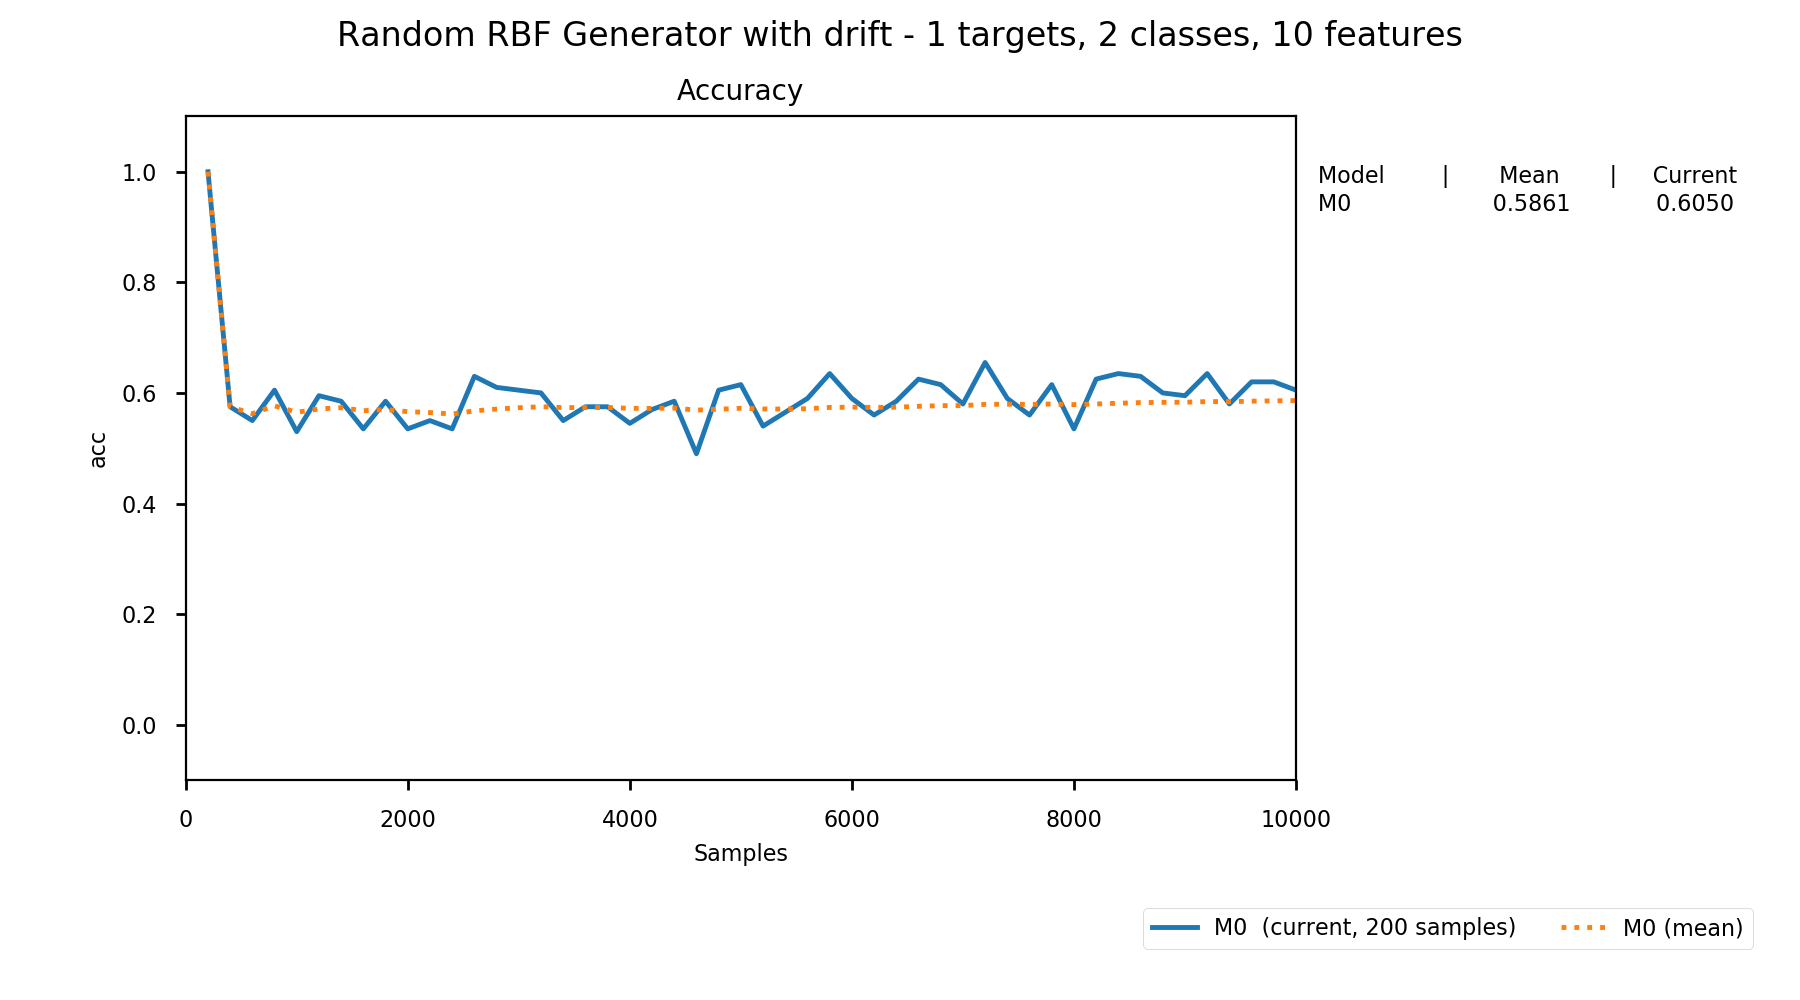

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [12.91s]
Processed samples: 10000
Mean performance:
M0 - Accuracy     : 0.5861


<IPython.core.display.Javascript object>


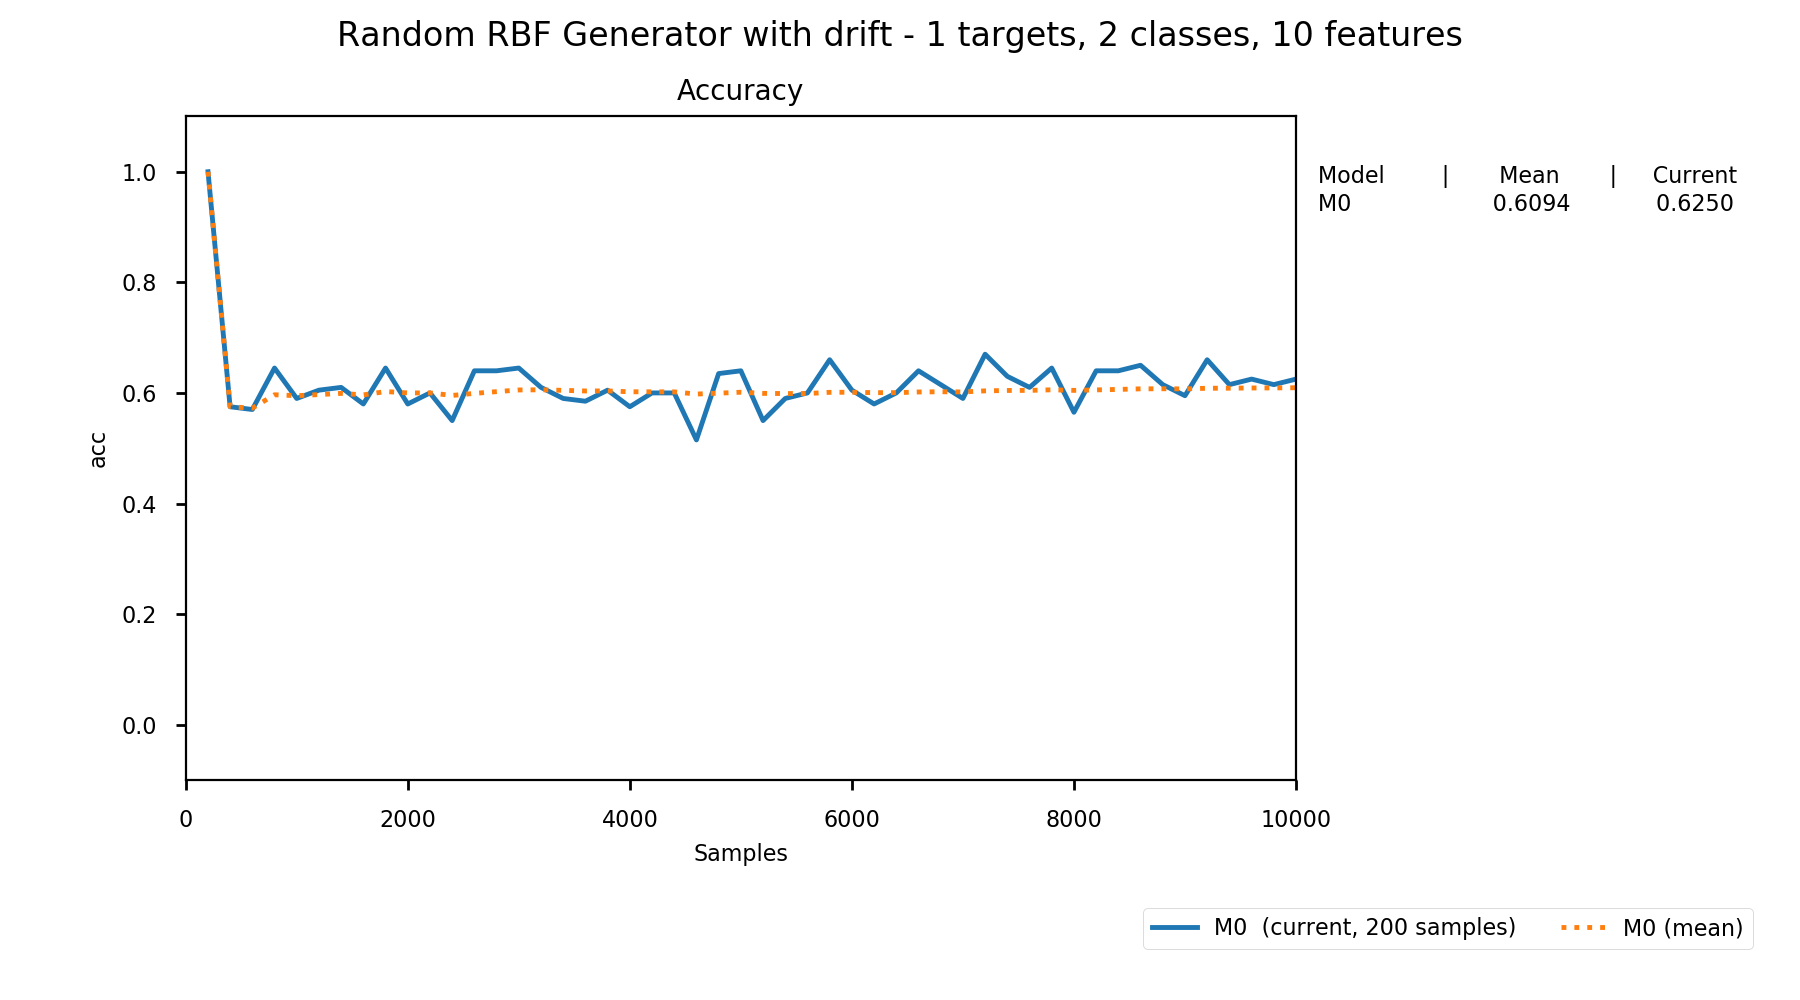

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [11.51s]
Processed samples: 10000
Mean performance:
M0 - Accuracy     : 0.6094


<IPython.core.display.Javascript object>


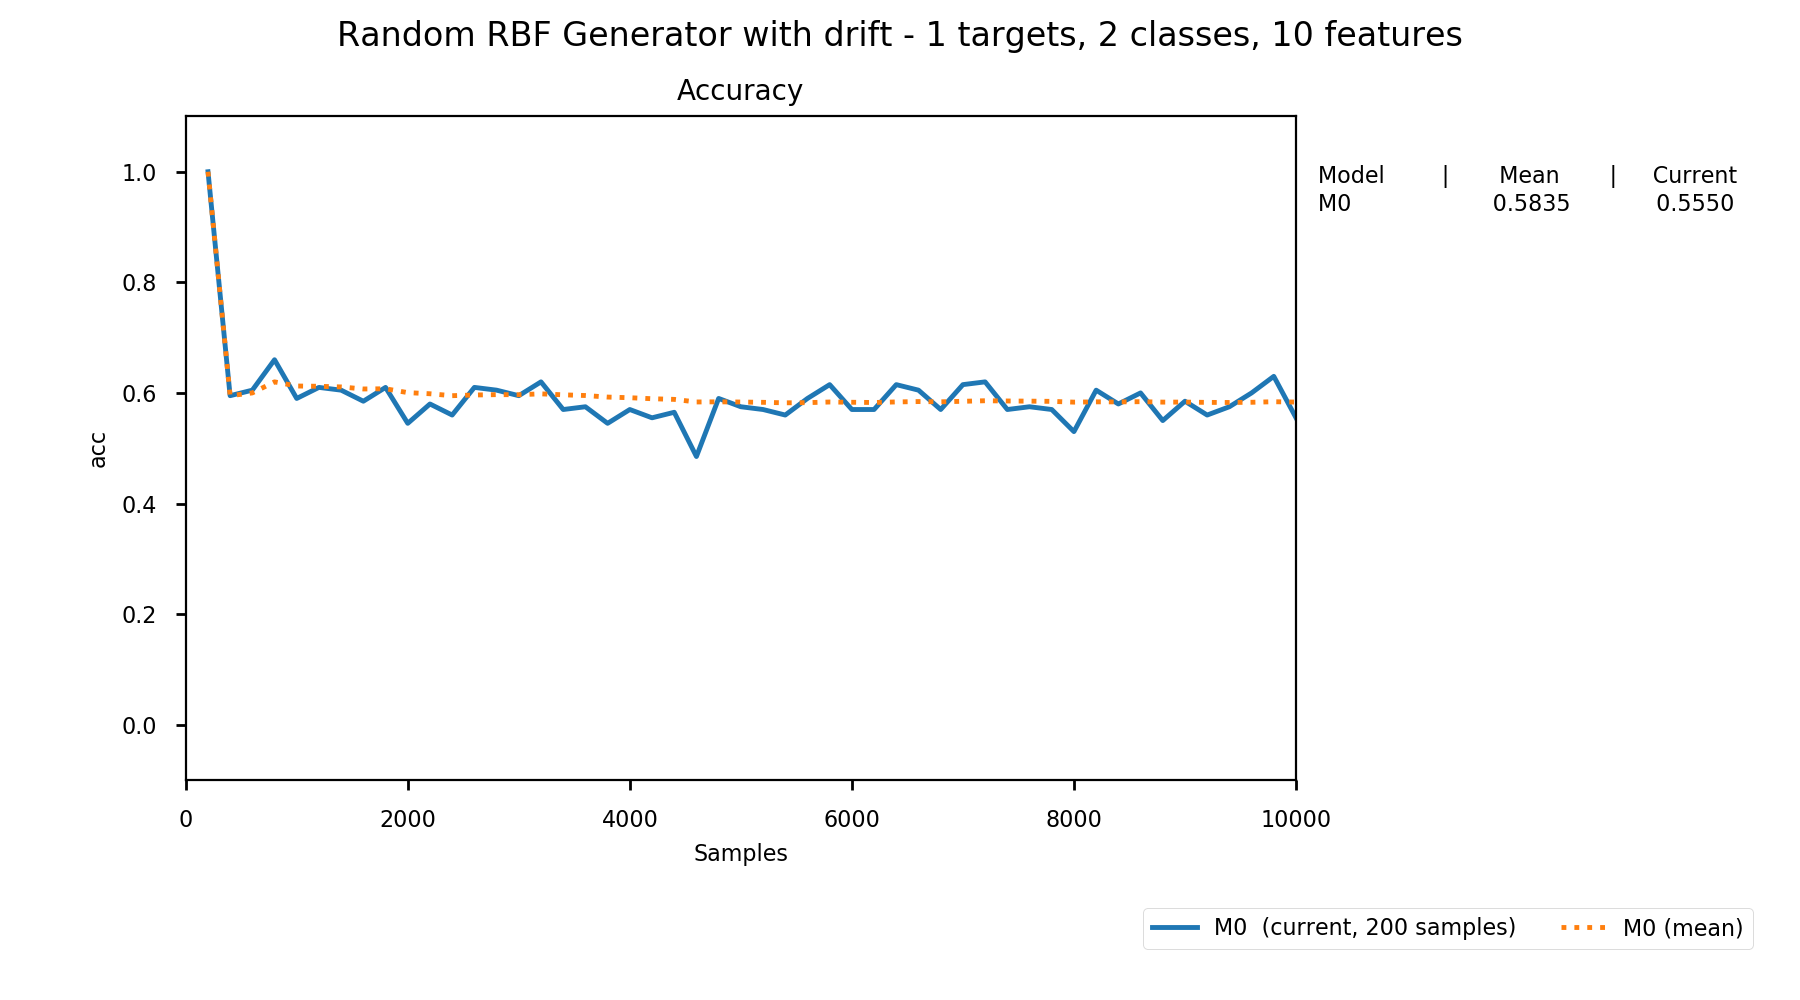

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [14.18s]
Processed samples: 10000
Mean performance:
M0 - Accuracy     : 0.5835


<IPython.core.display.Javascript object>


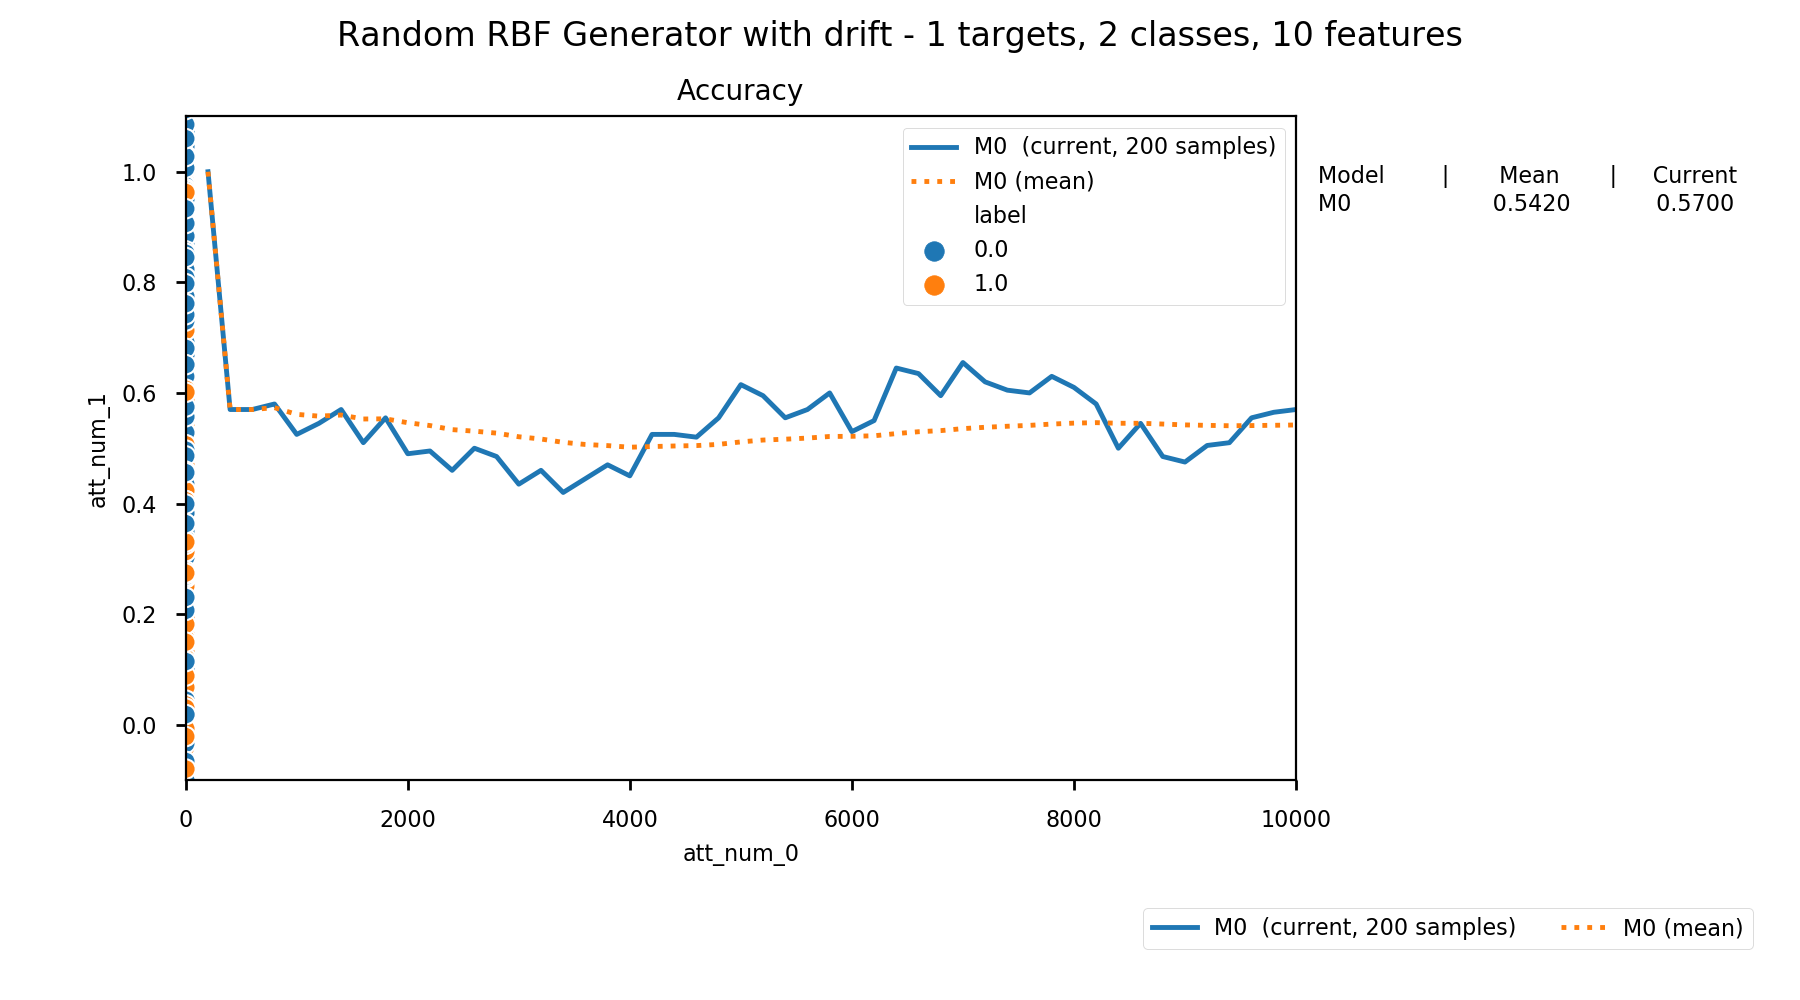

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [14.33s]
Processed samples: 10000
Mean performance:
M0 - Accuracy     : 0.5420


In [16]:
for i in speed:
    rbf_drift = RandomRBFGeneratorDrift(model_random_state=42, sample_random_state=42, change_speed=i)
    #rbf = RandomRBFGenerator(model_random_state=42, sample_random_state=42)
    rbf_drift.prepare_for_use()
    #rbf.prepare_for_use()
    #display(evaluator.evaluate(stream=rbf, model=nb))
    display(evaluator.evaluate(stream=rbf_drift, model=nb))
    rbf_drift.restart()

In [26]:
new_rbf = RandomRBFGenerator(model_random_state=42, sample_random_state=42, n_features=7, n_centroids=10)
new_rbf.prepare_for_use()

In [27]:
X, y = new_rbf.next_sample(1000)
new_rbf.feature_names.append('label')
df = pd.DataFrame(np.hstack((X,np.array([y]).T)), columns=new_rbf.feature_names)

In [28]:
df.head()

,att_num_0,att_num_1,att_num_2,att_num_3,att_num_4,att_num_5,att_num_6,label
0,1.273406,0.743415,0.251005,0.045525,-0.415295,0.331648,0.737445,1.0
1,0.523296,1.055953,0.640931,0.497936,0.055796,0.094025,0.065921,1.0
2,0.665706,0.450079,0.090046,0.476731,0.022529,0.905422,0.284087,1.0
3,0.746683,0.058467,0.342831,0.855339,-0.050896,-0.168920,-0.292183,0.0
4,0.142746,0.679846,0.117406,0.152654,0.364582,0.284231,0.936240,0.0


/Users/Feranor/anaconda3/envs/env_CD/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


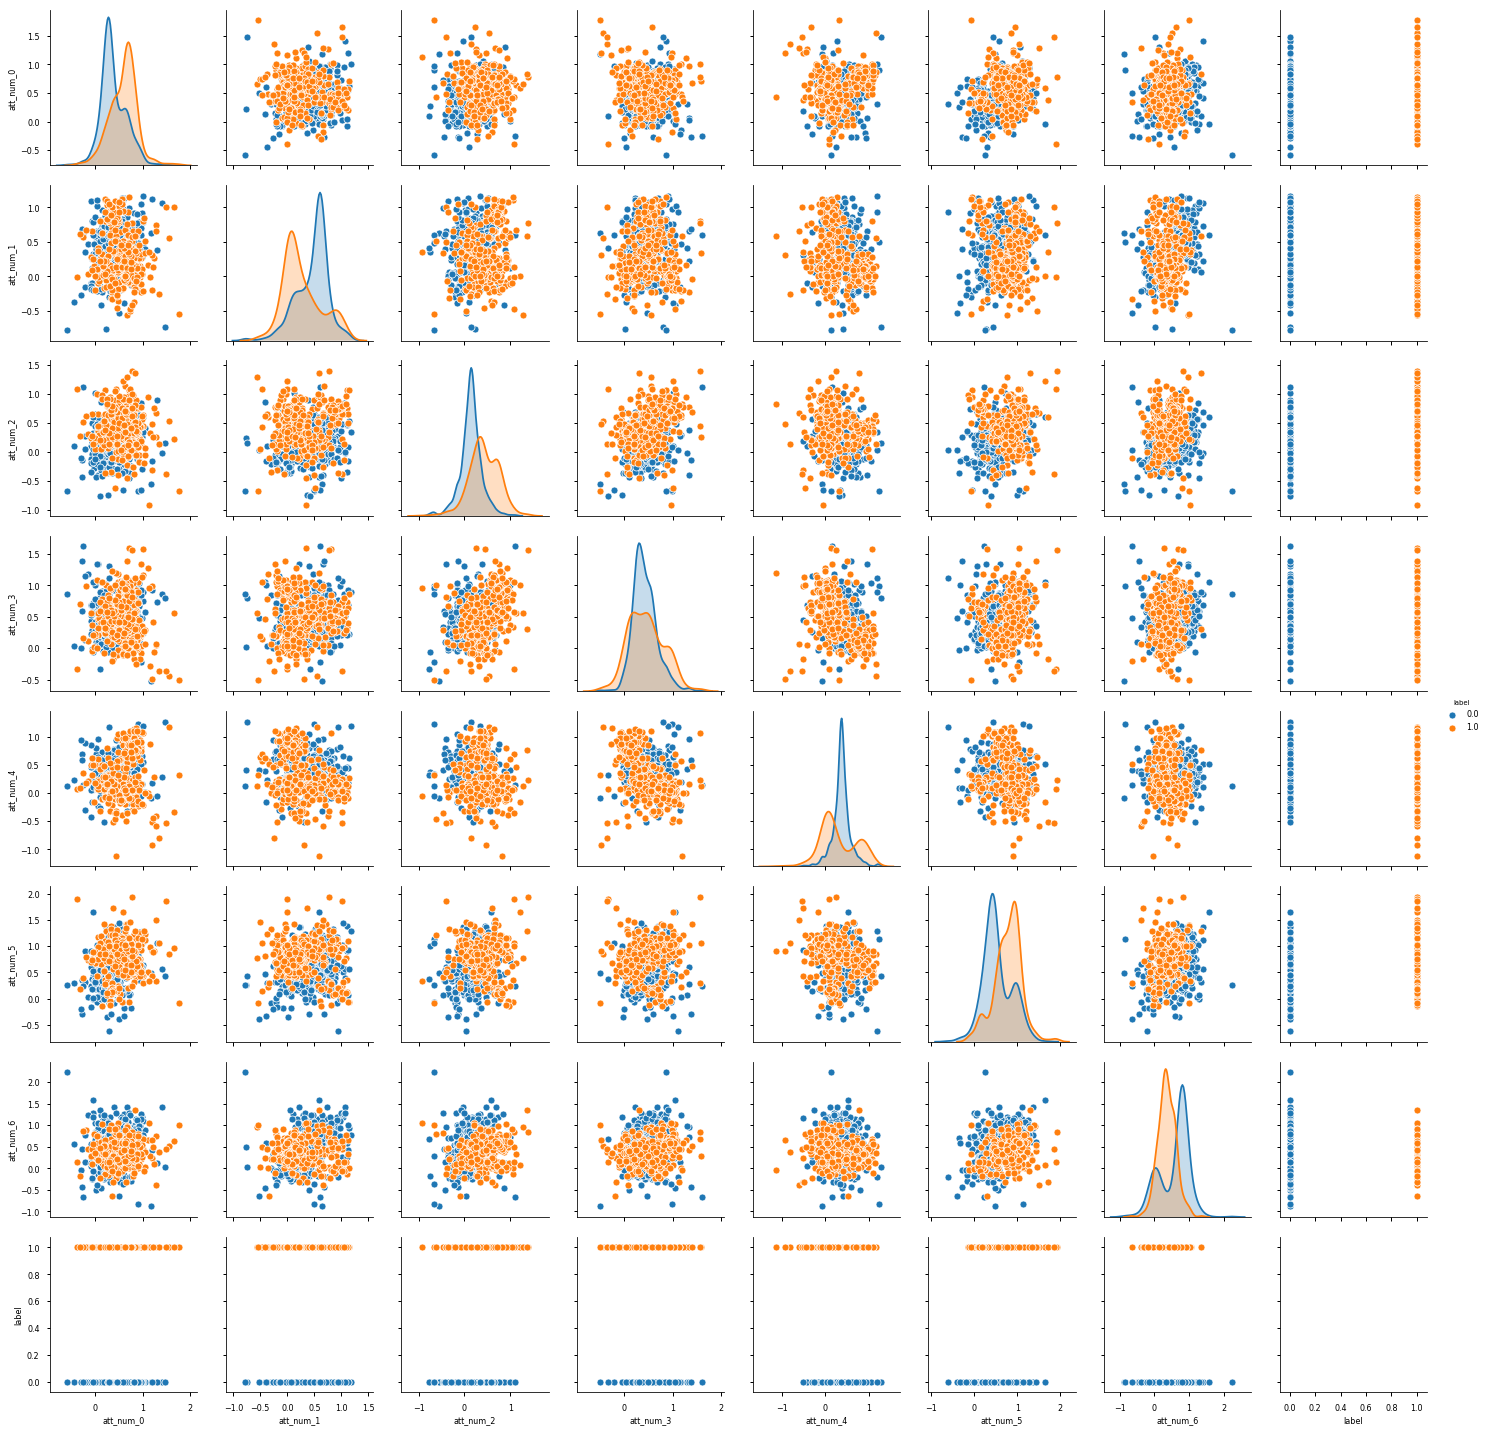

In [30]:
%matplotlib inline
sns.pairplot(hue='label', data=df)